MathTool HW3
2024-10-29

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from unknown_Systems import unknownSystem1, unknownSystem2, unknownSystem3

# Question 1 a)

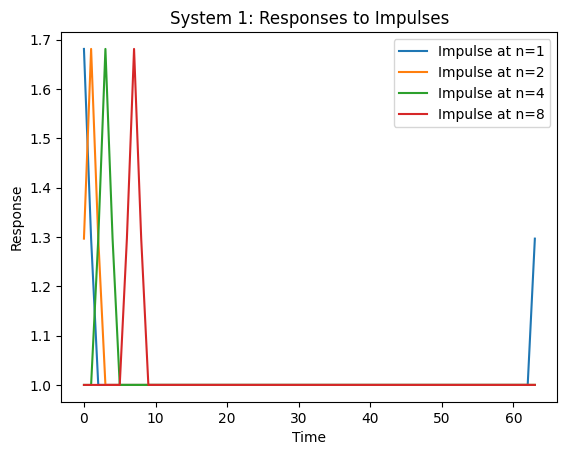

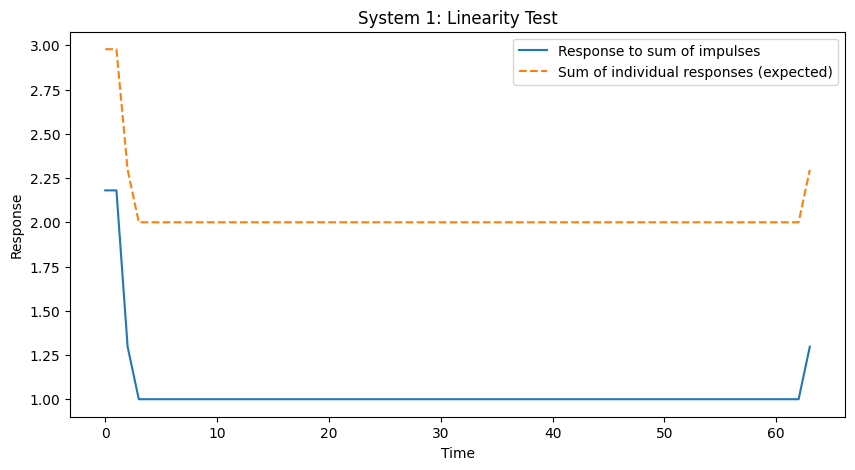

System 1 is NOT consistent with linearity.


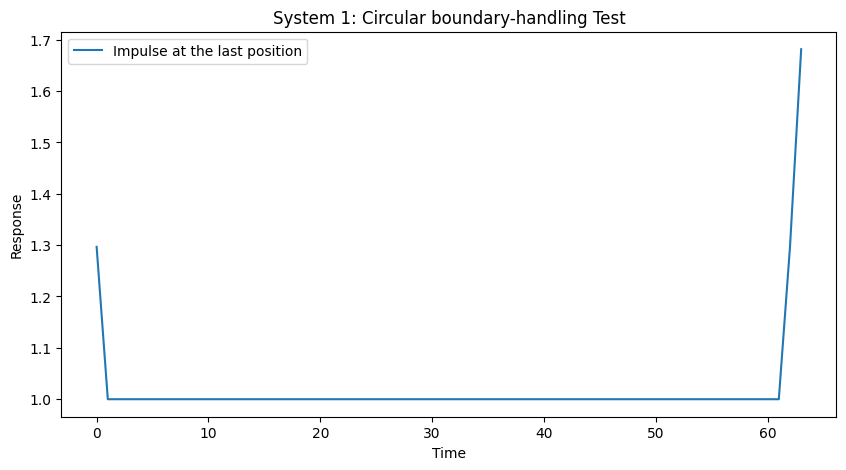

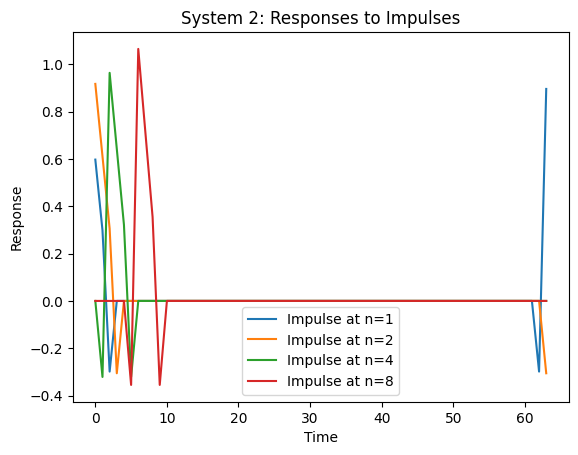

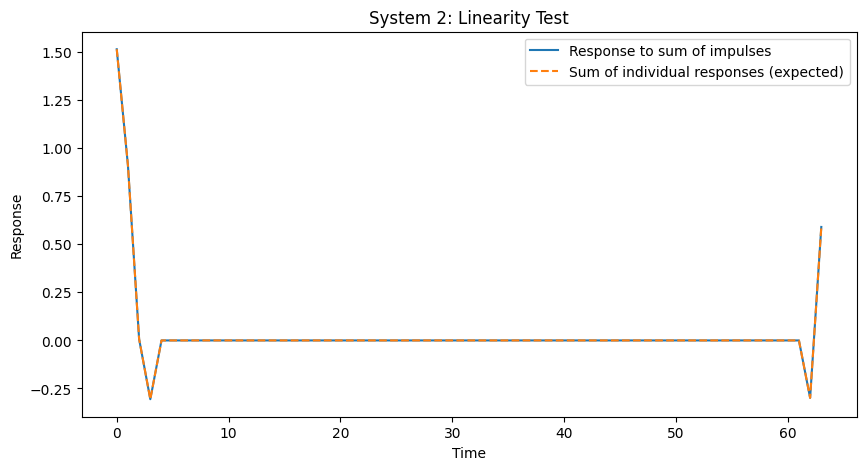

System 2 is consistent with linearity.


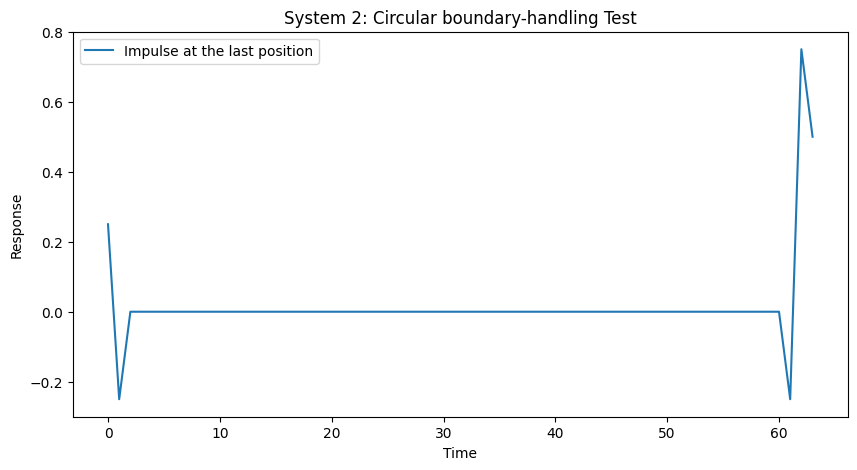

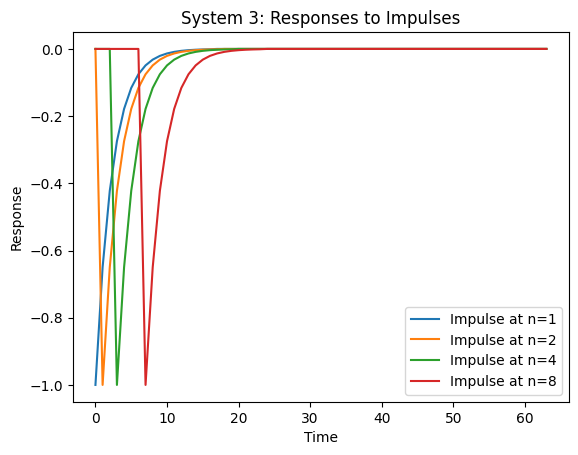

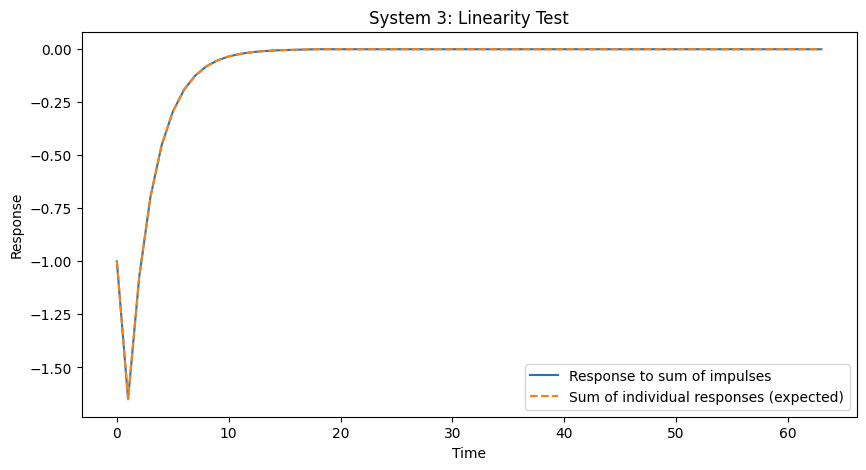

System 3 is consistent with linearity.


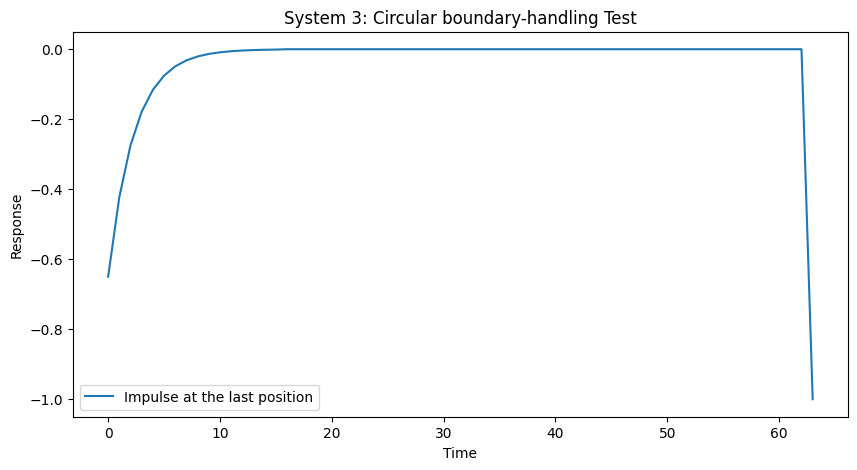

In [121]:

# Generate impulse signal
def create_impulse(length, position):
    impulse = np.zeros(length)
    impulse[position] = 1
    return impulse

#Test the system for shift-invariance and linearity
def test_system(system_func, system_name):
    N = 64 
    positions = [0,1,3,7]

    #Collecting response 
    responses = []
    for pos_idx in positions:
        impulse = create_impulse(N, pos_idx)
        response = system_func(impulse)
        responses.append(response)

        plt.plot(response, label=f'Impulse at n={pos_idx + 1}')
    
    plt.title(f'{system_name}: Responses to Impulses')
    plt.xlabel('Time')
    plt.ylabel('Response')
    plt.legend()
    plt.show()

    # Test linearity
    impulse_sum = create_impulse(N, positions[0]) + create_impulse(N, positions[1])
    response_sum = system_func(impulse_sum)
    expected_sum = responses[0] + responses[1]
    
    # Plot the actual vs expected responses
    plt.figure(figsize=(10, 5))
    plt.plot(response_sum, label='Response to sum of impulses')
    plt.plot(expected_sum, '--', label='Sum of individual responses (expected)')
    plt.title(f'{system_name}: Linearity Test')
    plt.xlabel('Time')
    plt.ylabel('Response')
    plt.legend()
    plt.show()
    
    # Sanity check: whether the responses match for the linearity test
    if np.allclose(response_sum, expected_sum): #check with TA whether this can be used ############################################
        print(f'{system_name} is consistent with linearity.')
    else:
        print(f'{system_name} is NOT consistent with linearity.')

    # Check boundary behavior
    boundary_impulse = create_impulse(N, N-1)  # Impulse at the last position
    boundary_response = system_func(boundary_impulse)
    
    # Plot the boundary behavior
    plt.figure(figsize=(10, 5))
    plt.plot(boundary_response, label='Impulse at the last position')
    plt.title(f'{system_name}: Circular boundary-handling Test')
    plt.xlabel('Time')
    plt.ylabel('Response')
    plt.legend()
    plt.show()

# For each system
test_system(unknownSystem1, "System 1")
test_system(unknownSystem2, "System 2")
test_system(unknownSystem3, "System 3")


In general, I performed three testes to examine the properties of shift-invariance, linearity and circular boundary-handling for all three systems. 

**For System 1:**
1. **In the shift-invariance test**, the responses of System 1 to impulses at different positions (n=1,2,4,8) were consistent in shape, with the output shifting proportionally to the position of the input impulse. This confirms that **<u>System 1 is shift-invariant</u>**, as the system’s response depends solely on the location of the impulse without altering the waveform itself.

2. **In the linearity test**, the system’s response to a combined impulse was equal to the sum of the individual responses to these impulses. This verifies that **<u>System 1 is not linear</u>**, as the the responses for two impulse is not equal to the response for sum of two impulse. 

3. **In the circular-boundary handling test**, when an impulse was placed at the boundary, the response was confined to the end of the output vector and did not convolve to affect the beginning of the output. This suggests that System 1 uses zero-padding or a similar method for handling boundaries, rather than circular boundary handling.



**For System 2:**
1. **In the shift-invariance test**, The responses of System 2 to impulses at different positions showed variations in waveform shape that were not simply shifted versions of each other. This indicates that **<u>System 2 violates shift-invariance</u>**, as the output depends not only on the position of the input impulse but also modifies the response shape in an inconsistent manner.

2. **In the linearity test**, the system’s response to the sum of impulses matched the sum of the individual responses. This confirms that **<u>System 2 is linea</u>r**, as it adheres to the principle of superposition.

3. **In the circular-boundary handling test**, when an impulse was placed at the boundary, it caused the output to wrap around and affect the beginning of the response vector. This indicates that System 2 uses circular boundary handling, demonstrating a  circular convolution.


**For System 3:**
1. **In the shift-invariance test**, the responses of System 3 to impulses at different positions were consistent in shape and only shifted according to the input position. This confirms that **<u>System 3 is shift-invariant</u>**, as the output response remains consistent regardless of where the impulse is located in the input.
2. **In the linearity test**, the response matches the sum of the individual impulse responses. There were mp discrepancies, indicating that **<u>System 3 is linear</u>**.
3. **In the circular-boundary handling test**, an impulse at the boundary of System 3 produced a response that did not wrap around to the beginning of the output vector. This suggests that System 3 employs zero-padding or is not useing circular boundary handling. 

# Question 1 b)

In [122]:
N = 64
input_freqs = [2, 4, 8, 16]  # Input frequencies for sinusoids

In [123]:
def create_positive_sinusoid(length, frequency, phase):
    n = np.arange(length)
    sinusoid = np.sin(frequency * n + phase)
    sinusoid += 1  # Make all elements positive
    return sinusoid

In [124]:
# Testing response of the system to different sinusoidal inputs
def test_frequency_subspace(system_func, system_name):
    print(f"\nFrequency Subspace Analysis for {system_name}:")
    
    for freq in input_freqs:
        #Sinusoid waves
        random_phase = np.random.uniform(0, 2 * np.pi)
        scaled_freq = np.pi * freq / N
        input_signal = create_positive_sinusoid(N, scaled_freq, random_phase)
        
    
        output_signal = system_func(input_signal)
        
        # FFT
        fft_input = np.fft.fft(input_signal)
        fft_output = np.fft.fft(output_signal)
        
        # frequency with maximum amplitudes
        win = np.argmax(np.abs(fft_input))
        wout = np.argmax(np.abs(fft_output))
        
        # Check if the dominant frequency of input matches that of output
        if win == wout:
            print(f"  Output sinusoid at {freq}π/64 lies within the subspace of the input sinusoid.")
        else:
            print(f"  Output sinusoid at {freq}π/64 does NOT match the input sinusoid frequency.")



In [125]:
test_frequency_subspace(unknownSystem1, "System 1")
test_frequency_subspace(unknownSystem2, "System 2")
test_frequency_subspace(unknownSystem3, "System 3")


Frequency Subspace Analysis for System 1:
  Output sinusoid at 2π/64 lies within the subspace of the input sinusoid.
  Output sinusoid at 4π/64 lies within the subspace of the input sinusoid.
  Output sinusoid at 8π/64 lies within the subspace of the input sinusoid.
  Output sinusoid at 16π/64 lies within the subspace of the input sinusoid.

Frequency Subspace Analysis for System 2:
  Output sinusoid at 2π/64 lies within the subspace of the input sinusoid.
  Output sinusoid at 4π/64 lies within the subspace of the input sinusoid.
  Output sinusoid at 8π/64 lies within the subspace of the input sinusoid.
  Output sinusoid at 16π/64 lies within the subspace of the input sinusoid.

Frequency Subspace Analysis for System 3:
  Output sinusoid at 2π/64 lies within the subspace of the input sinusoid.
  Output sinusoid at 4π/64 lies within the subspace of the input sinusoid.
  Output sinusoid at 8π/64 lies within the subspace of the input sinusoid.
  Output sinusoid at 16π/64 lies within the 

# Question 1 c）

In [126]:
def get_impulse_response(system_func):
    impulse = np.zeros(N)
    impulse[0] = 1  # Impulse at the first position
    return system_func(impulse)

In [127]:
def verify_amplitude_phase(system_func, system_name):
    print(f"\nAmplitude and Phase Analysis for {system_name}:")
    
    impulse_response = get_impulse_response(system_func)
    r_tilde = np.fft.fft(impulse_response)  # FFT of impulse response
    
    n = np.arange(N)
    
    for freq in input_freqs:
        f = np.pi * freq * n / N
        
        #input sinusoids and cosoids
        input_sinusoid = np.sin(f)
        input_cosoid = np.cos(f)
        
        #output after passing through the system
        output_sinusoid = system_func(input_sinusoid)
        
        #dot products with the impulse response
        cr = np.dot(impulse_response, input_cosoid)
        sr = np.dot(impulse_response, input_sinusoid)
        
        #get the amplitude and phase of the signal
        Ar = np.sqrt(cr**2 + sr**2)  #amplitude
        phase = np.arctan2(sr, cr)  
        
        #frequency index for r_tilde
        freq_index = freq // 2 
        
        # Compare amplitude and phase with the Fourier Transform of the impulse response
        amplitude_match = abs(Ar - np.abs(r_tilde[freq_index])) <= 0.01
        phase_match = abs(phase - np.angle(r_tilde[freq_index])) <= 0.01
        
        # Output results
        if amplitude_match:
            print(f"  Amplitude of sinusoid at {freq}π/64 matches the FFT of impulse response.")
        else:
            print(f"  Amplitude of sinusoid at {freq}π/64 does NOT match the FFT of impulse response.")
        
        if phase_match:
            print(f"  Phase of sinusoid at {freq}π/64 matches the FFT of impulse response.")
        else:
            print(f"  Phase of sinusoid at {freq}π/64 does NOT match the FFT of impulse response.")

verify_amplitude_phase(unknownSystem1, "System 1")
verify_amplitude_phase(unknownSystem2, "System 2")
verify_amplitude_phase(unknownSystem3, "System 3")


Amplitude and Phase Analysis for System 1:
  Amplitude of sinusoid at 2π/64 matches the FFT of impulse response.
  Phase of sinusoid at 2π/64 matches the FFT of impulse response.
  Amplitude of sinusoid at 4π/64 matches the FFT of impulse response.
  Phase of sinusoid at 4π/64 matches the FFT of impulse response.
  Amplitude of sinusoid at 8π/64 matches the FFT of impulse response.
  Phase of sinusoid at 8π/64 matches the FFT of impulse response.
  Amplitude of sinusoid at 16π/64 matches the FFT of impulse response.
  Phase of sinusoid at 16π/64 matches the FFT of impulse response.

Amplitude and Phase Analysis for System 2:
  Amplitude of sinusoid at 2π/64 matches the FFT of impulse response.
  Phase of sinusoid at 2π/64 does NOT match the FFT of impulse response.
  Amplitude of sinusoid at 4π/64 matches the FFT of impulse response.
  Phase of sinusoid at 4π/64 does NOT match the FFT of impulse response.
  Amplitude of sinusoid at 8π/64 matches the FFT of impulse response.
  Phase of

**For both system 1 and system 2**, both linearity and shift-invariance appear to be violated in System 1. The system does not maintain consistent behavior in terms of scaling (linearity) or phase shift (shift-invariance) across the tested frequencies. **For system 3**, it demonstrates LSI behavior at some frequencies (0.10, 0.2 and 0.79) but violates it at others (0.20 and 0.39). This partial consistency suggests that System 3 might be partially linear and shift-invariant, but not over the entire frequency spectrum.

In my testes, for Systems 1 and 2, the tests guarantee that the systems are not LSI. But for system 3, the tests showes that the system is partial consistency with LSI behavior. However, since discrepancies exist at specific frequencies, the test is not guaranting the LSI.

For possible tests that can guarantee LSI, here are some possible tests that coudl work:
1. Impulse Response Test, since it tests the system’s response to impulses at different positions to check for shift-invariance. It can also test the system’s response to a combination of impulses to verify linearity.
2. White Noise Test, by applying white noise to observe if the system outputs a consistent power spectral density that aligns with its frequency response.

